In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
#import scikitplot as skplt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
#전처리 코드 get_dummies
df2 = pd.get_dummies(df, columns = ['HeartDisease','Smoking',
                                    'AlcoholDrinking','Stroke',
                                    'DiffWalking','Sex',
                                    'AgeCategory','Race',
                                    'Diabetic','PhysicalActivity',
                                    'GenHealth','Asthma',
                                    'KidneyDisease','SkinCancer']
                     ,drop_first=True
                    )


In [ ]:
#데이터 합치기 ( 사용할 데이터들)
df_num = df[['BMI','PhysicalHealth','MentalHealth','SleepTime']]
df_nom = df2.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'],axis=1)

In [ ]:
#로버스터 스케일링 진행
RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df_num)

In [ ]:
# 데이터 병합
df_num2 = pd.DataFrame(data=df_robust, columns=df_num.columns)

In [ ]:
#데이터 병합
df3 = pd.concat([df_num2,df_nom],axis=1)

In [ ]:
# 독립변수, 종속변수
X = df3.drop(['HeartDisease_Yes'],axis=1)
y = df3[['HeartDisease_Yes']]



In [ ]:
X= X*1 #전처리 완료

In [ ]:
y=y*1  #전처리 완료

In [ ]:
y.value_counts()

HeartDisease_Yes
0                   292422
1                    27373
Name: count, dtype: int64

In [ ]:
#train, test 나누기!
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3,random_state=10)

In [ ]:
X_train

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
15864,-1.074425,2.5,5.000000,-1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
266220,0.645467,0.0,2.000000,-0.5,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
102361,0.263870,3.0,10.000000,-0.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10343,-0.860622,0.0,0.000000,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
310108,0.366712,0.0,0.000000,0.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299741,0.691475,15.0,1.666667,0.5,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
9372,-0.012179,15.0,10.000000,-0.5,1,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0
105595,-0.822733,0.0,0.000000,0.5,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
93553,1.410014,0.0,0.000000,-0.5,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


## 클래스가 불균형한 상태로 바로 모델링을 통해 평가지표를 확인하기!

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#실제 예측값 추출
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Confusion Matrix 확인

In [ ]:
cm =confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[87000,   727],
       [ 7352,   860]])

In [ ]:
# 혼동행렬을 데이터프레임 변환해서 살펴보기

cm_df =pd.DataFrame(data=cm,
            index =[f'True Class-{i}' for i in range(cm.shape[0])],
            columns = [f'Predicted Calss-{i}' for i in range(cm.shape[0])])


In [ ]:
cm_df

,Predicted Calss-0,Predicted Calss-1
True Class-0,87000,727
True Class-1,7352,860


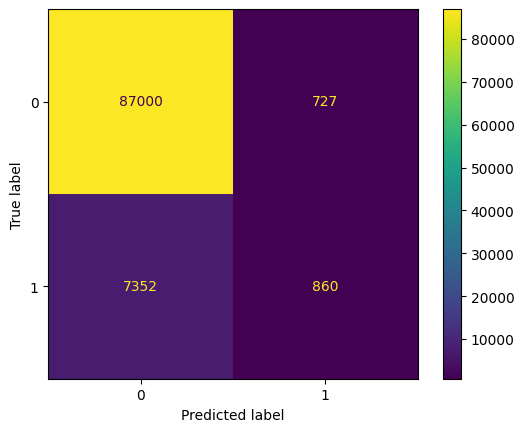

In [ ]:
#시각적으로 살펴보기
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [ ]:
#정확도
ac = model.score(X_test, y_test)
print(ac,'정확도')
#정밀도
ps = precision_score(y_test, y_pred)
print(ps,'정밀도')

#민감도
rs = recall_score(y_test, y_pred)
print(rs,'민감도')
#f1스코어
f1=f1_score(y_test, y_pred)
print(f1,'f1스코어')

0.9157902417160905 정확도
0.5419029615626969 정밀도
0.10472479298587432 민감도
0.1755281151137871 f1스코어


## 필수과제 1
- PDF 정리된 내용을 본인의 언어로 정리해서 PDF파일로 올리기
- TP, TN FP, FN 개념 설명되어 있는데, 해당 값을 실제값으로 넣어서 공식을 수기로 계산 10 30 58 21 => 간단하게 수치를 넣어 계산하고
- 개념에 대해서 정리하기!


## 필수과제 2
- 클래스가 불균형인 경우
- 0.9157902417160905 정확도
- 0.5419029615626969 정밀도
- 0.10472479298587432 민감도
- 0.1755281151137871 f1스코어

### 클래스를 균형으로 맞추고( 언더 샘플링 진행 등 )
- 실제 정확도, 정밀도, 민감도, f1스코어 개선되었는지 확인